In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

读取数据 合并做预处理

In [56]:
# 读取数据
train_df = pd.read_csv(r'C:\Users\yaw\Desktop\大三下\数据分析课程设计\5 大型超市销售预测((学生）\train.csv')
test_df = pd.read_csv(r'C:\Users\yaw\Desktop\大三下\数据分析课程设计\5 大型超市销售预测((学生）\test.csv')

# 合并数据帧
merged_df = pd.concat([train_df, test_df], ignore_index=True)

# 打印合并后的数据帧
merged_df.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4571,FDK24,9.195,Low Fat,0.101500,Baking Goods,45.2744,OUT045,2002,NaN,Tier 2,Supermarket Type1,679.1160
6133,FDV26,20.250,Regular,0.076315,Dairy,196.7794,OUT045,2002,NaN,Tier 2,Supermarket Type1,2731.1116
9299,FDB28,6.615,Low Fat,0.093766,Dairy,199.2426,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5316,NCV41,14.350,Low Fat,0.017065,Health and Hygiene,109.5228,OUT049,1999,Medium,Tier 1,Supermarket Type1,1768.3648
13069,FDT01,NaN,Regular,0.183276,Canned,210.4902,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


计算null、0值个数

In [57]:
merged_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [58]:
merged_df['Item_Visibility'][merged_df['Item_Visibility']==0].count()

879

预处理数据

In [59]:
# 使用groupby和agg计算平均值来处理Item_Weight和Item_Visibility
average_values = merged_df.groupby('Item_Identifier').agg({'Item_Weight': 'mean', 'Item_Visibility': 'mean'})

# 用平均值填充缺失的Item_Weight
miss_bool = merged_df['Item_Weight'].isnull()
merged_df.loc[miss_bool, 'Item_Weight'] = merged_df.loc[miss_bool, 'Item_Identifier'].apply(lambda x: average_values.loc[x, 'Item_Weight'])

# 用平均值替代等于0的Item_Visibility
zero_visibility_bool = (merged_df['Item_Visibility'] == 0)
merged_df.loc[zero_visibility_bool, 'Item_Visibility'] = merged_df.loc[zero_visibility_bool, 'Item_Identifier'].apply(lambda x: average_values.loc[x, 'Item_Visibility'])


In [60]:
average_values

,Item_Weight,Item_Visibility
Item_Identifier,,
DRA12,11.600,0.034938
DRA24,19.350,0.045646
DRA59,8.270,0.133384
DRB01,7.390,0.079736
DRB13,6.115,0.006799
...,...,...
NCZ30,6.590,0.027302
NCZ41,19.850,0.056396
NCZ42,10.500,0.011015


In [61]:
# 创建交叉表
cross_tab = pd.crosstab(merged_df['Outlet_Identifier'], merged_df['Outlet_Size'], dropna=False)

# # 应用样式
styled_cross_tab = cross_tab.T.style.background_gradient(cmap='summer_r')
styled_cross_tab

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Size,,,,,,,,,,
High,0,1553,0,0,0,0,0,0,0,0
Medium,0,0,0,1546,0,1559,0,0,0,1550
Small,0,0,0,0,880,0,1550,0,1550,0
nan,925,0,1543,0,0,0,0,1548,0,0


In [62]:
#查看大小和类型的关系
cross_tab = pd.crosstab(merged_df.Outlet_Identifier,[merged_df.Outlet_Type,merged_df.Outlet_Size],dropna=False)
styled_cross_tab = cross_tab.T.style.background_gradient(cmap='summer_r')
styled_cross_tab

In [63]:
## 替换方法
merged_df.loc[(merged_df.Outlet_Identifier=='OUT010'),'Outlet_Size']='Small'
merged_df.loc[(merged_df.Outlet_Identifier=='OUT017'),'Outlet_Size']='Small'
merged_df.loc[(merged_df.Outlet_Identifier=='OUT045'),'Outlet_Size']='Small'


In [64]:
print(merged_df.isnull().sum())
merged_df['Item_Visibility'][merged_df['Item_Visibility']==0].count()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


0

上文对某些字段进行了假设关联，现在对该数据字段进行字段的清洗，并进行探索性数据分析。

<Axes: title={'center': 'Item_Fat_Content'}, xlabel='Item_Fat_Content'>

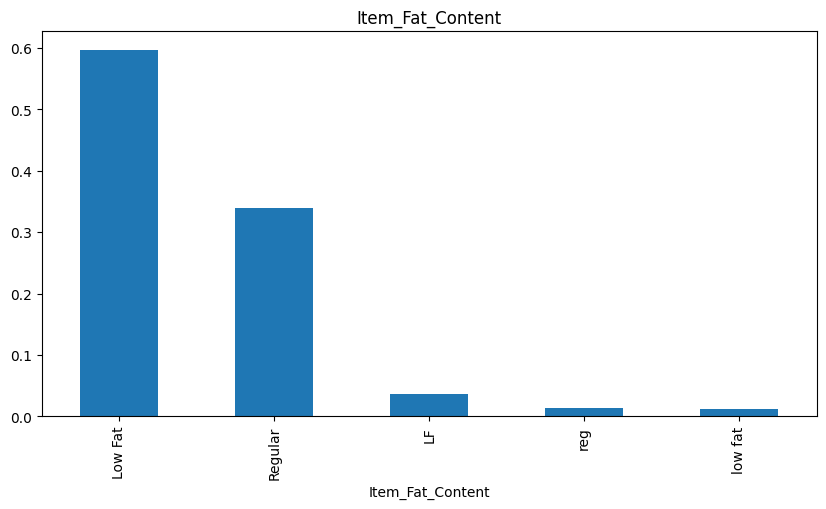

In [65]:
# 产品是否低脂与产品健康假设关联

#画出直方图看数据情况

merged_df['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Item_Fat_Content')

<Axes: xlabel='Item_Fat_Content'>

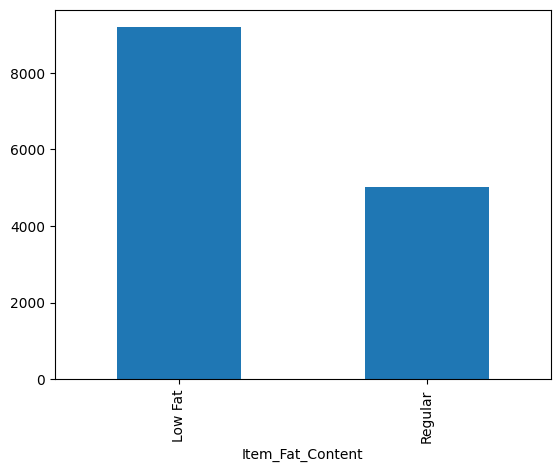

In [66]:
# 可以看出 low fat、LF、Low Fat为同一类别，所以可以将其合并。Regular、reg为统一类别。

merged_df = merged_df.replace(['Low Fat', 'LF','low fat'], 'Low Fat')
merged_df = merged_df.replace(['Regular','reg'], 'Regular')
merged_df['Item_Fat_Content'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Item_Type'}, xlabel='Item_Type'>

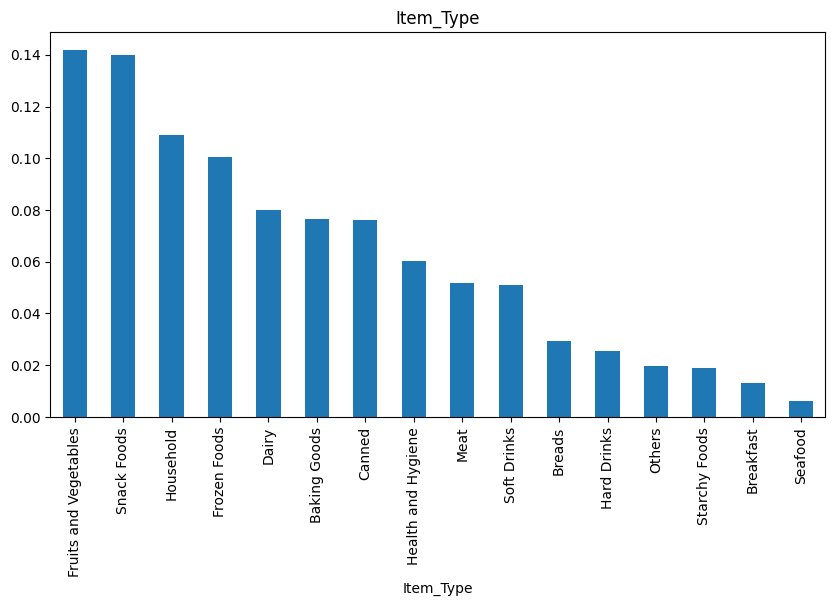

In [67]:
# 类别
merged_df['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Item_Type')

<Axes: title={'center': 'Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year'>

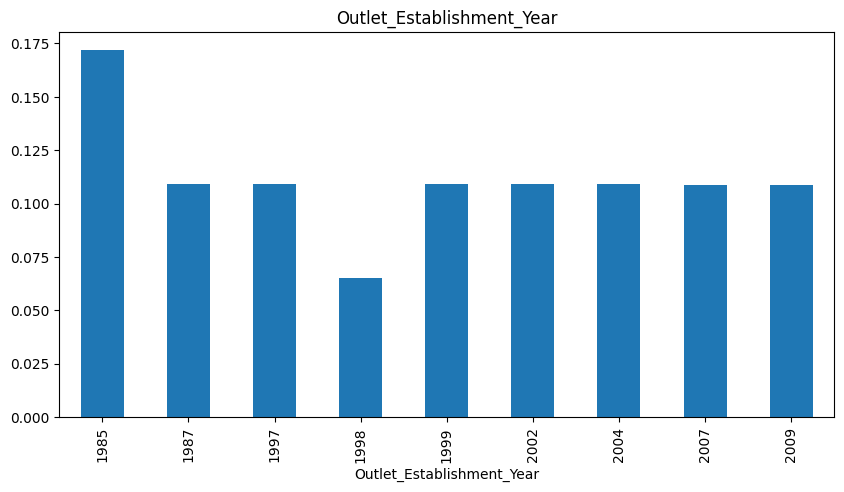

In [68]:
merged_df['Outlet_Establishment_Year'] \
.value_counts(normalize=True)   \
.sort_index().plot \
.bar(figsize=(10,5), title= 'Outlet_Establishment_Year')

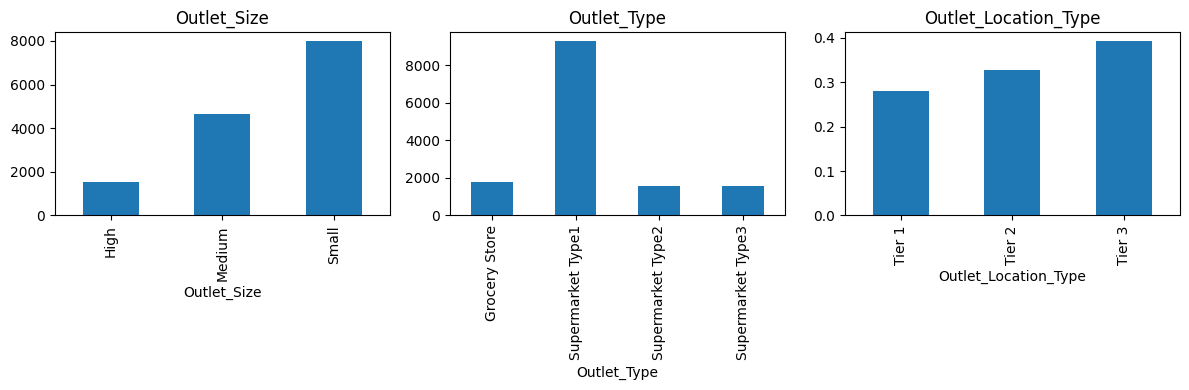

In [69]:
# 创建一个包含三个子图的画布，并指定合适的尺寸
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

merged_df['Outlet_Size'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Outlet_Size')
merged_df['Outlet_Type'].value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Outlet_Type')
merged_df['Outlet_Location_Type'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[2], title='Outlet_Location_Type')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Outlet_Identifier'}, xlabel='Outlet_Identifier'>

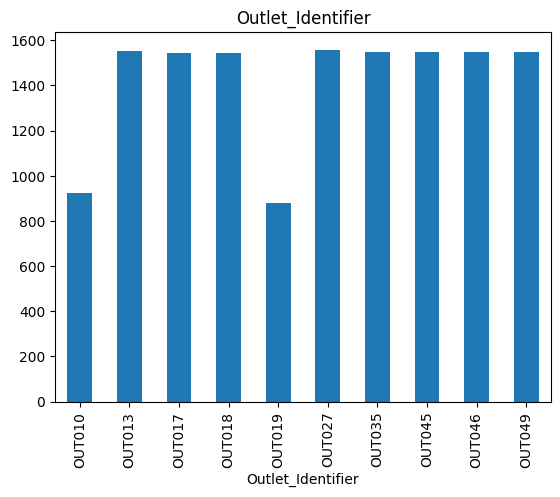

In [70]:
merged_df['Outlet_Identifier'].value_counts().sort_index().plot(kind='bar',  title='Outlet_Identifier')

C:\Users\yaw\AppData\Local\Temp\ipykernel_18896\1576760254.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Item_Outlet_Sales'])
C:\Users\yaw\AppData\Local\Temp\ipykernel_18896\1576760254.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Item_Weight'])
C:\Users\yaw\Ap

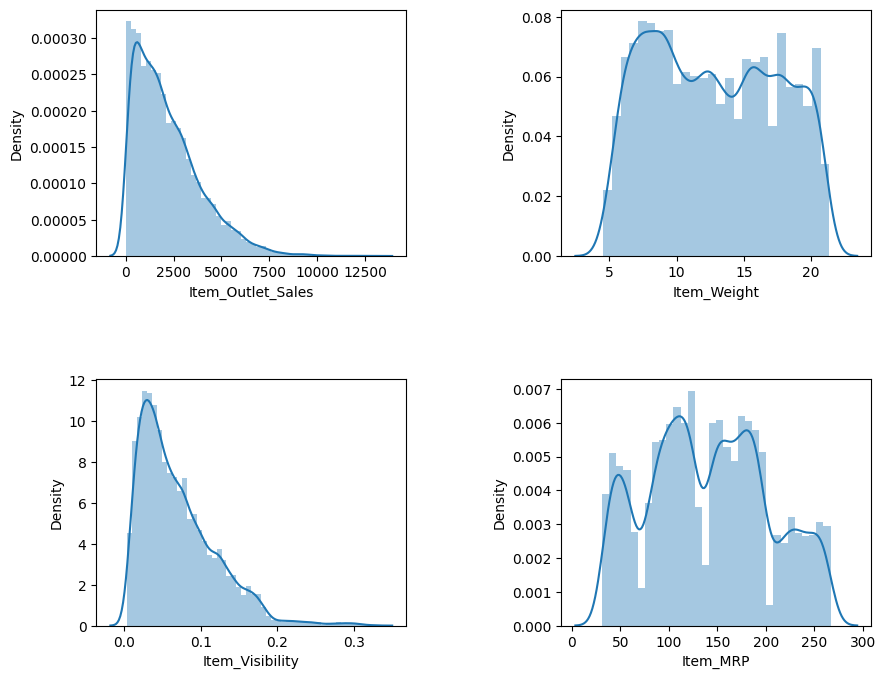

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))


plt.subplot(221)
sns.distplot(merged_df['Item_Outlet_Sales'])
plt.subplot(222)
sns.distplot(merged_df['Item_Weight'])
plt.subplot(223)
sns.distplot(merged_df['Item_Visibility'])
plt.subplot(224)
sns.distplot(merged_df['Item_MRP'])

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

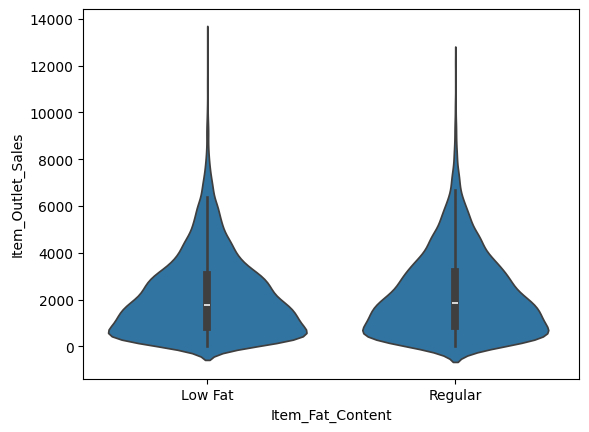

In [72]:
#脂肪含量
sns.violinplot(x=merged_df['Item_Fat_Content'], y=merged_df['Item_Outlet_Sales'])


<Figure size 640x480 with 0 Axes>

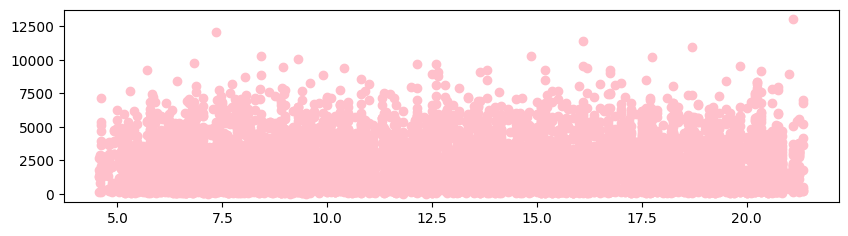

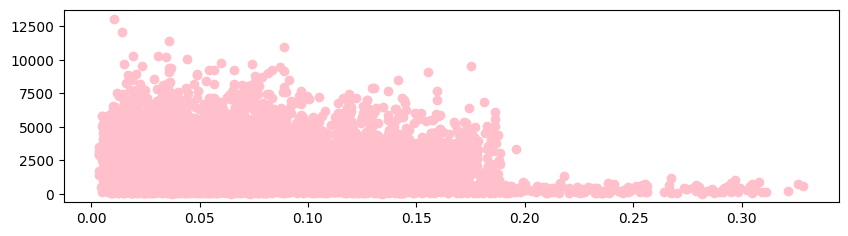

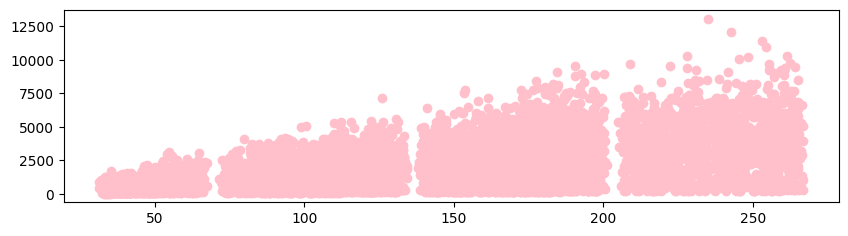

In [73]:
#物品重量 和 销售量的相关性
plt.figure(1)
fig,ax=plt.subplots(figsize=(10,2.5))
ax.scatter(merged_df['Item_Weight'], merged_df['Item_Outlet_Sales'],color='pink')

#物品可见度 和 销售量的相关性
plt.figure(2)
fig,ax=plt.subplots(figsize=(10,2.5))
ax.scatter(merged_df['Item_Visibility'], merged_df['Item_Outlet_Sales'],color='pink')
#物品可见度 和 销售量的相关性

# tem_MRP 和销量相关性
plt.figure(3)
fig,ax=plt.subplots(figsize=(10,2.5))
ax.scatter(merged_df['Item_MRP'], merged_df['Item_Outlet_Sales'],color='pink')


C:\Users\yaw\AppData\Local\Temp\ipykernel_18896\392148649.py:6: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x=merged_df['Item_Type'], y=merged_df['Item_Outlet_Sales'],scale="linear",color="yellow")


<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

<Figure size 640x480 with 0 Axes>

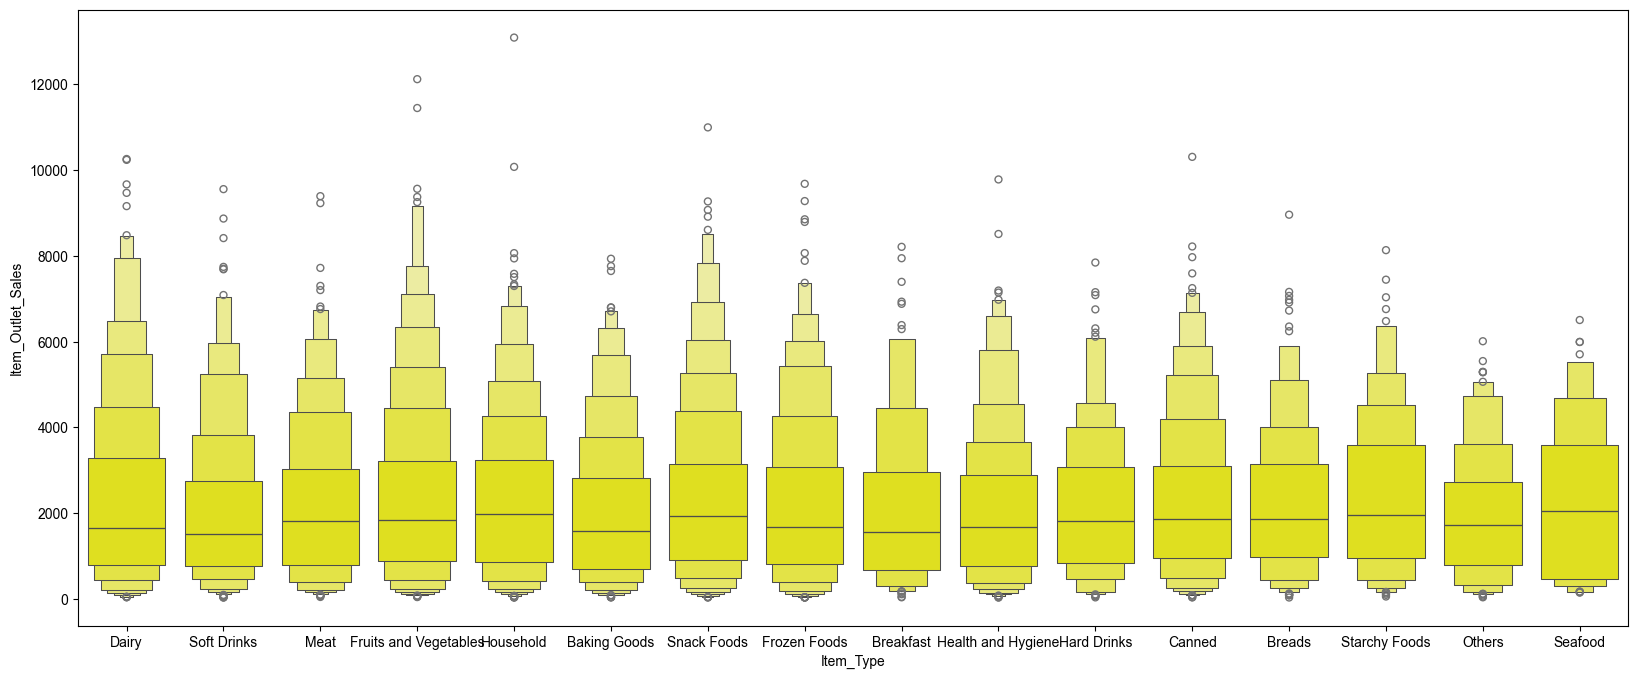

In [74]:
#物品类别和销量关系
import seaborn as sns
plt.figure(1)
fig,ax=plt.subplots(figsize=(20,8))
sns.set(style="whitegrid")
sns.boxenplot(x=merged_df['Item_Type'], y=merged_df['Item_Outlet_Sales'],scale="linear",color="yellow")


C:\Users\yaw\AppData\Local\Temp\ipykernel_18896\3728947125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


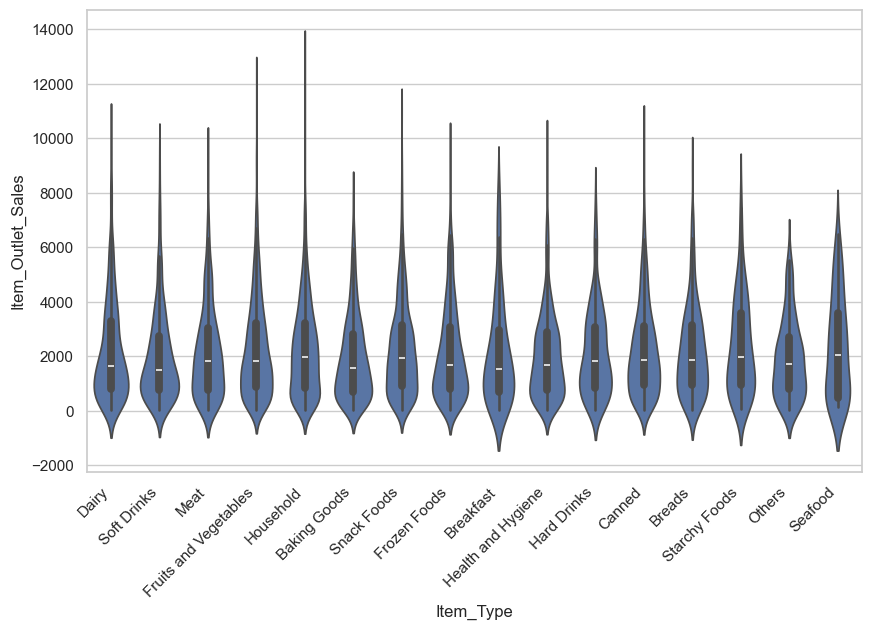

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(x=merged_df['Item_Type'], y=merged_df['Item_Outlet_Sales'], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


In [76]:
#标签编码
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
laber_features = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Type','Outlet_Type']
for i in laber_features:
    merged_df[i] = LE.fit_transform(merged_df[i])

# 独热编码
#One Hot Coding:
merged_df['Outlet'] = merged_df['Outlet_Identifier'] 
merged_df = pd.get_dummies(merged_df, columns=['Outlet'],dtype=float)


In [77]:
merged_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_OUT010,Outlet_OUT013,Outlet_OUT017,Outlet_OUT018,Outlet_OUT019,Outlet_OUT027,Outlet_OUT035,Outlet_OUT045,Outlet_OUT046,Outlet_OUT049
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FDX07,19.20,1,0.017834,6,182.0950,OUT010,1998,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.93,0,0.009780,9,53.8614,OUT013,1987,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,13,141.3154,OUT046,1997,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14200,FDD47,7.60,1,0.142991,15,169.1448,OUT018,2009,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14201,NCO17,10.00,0,0.073529,8,118.7440,OUT045,2002,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14202,FDJ26,15.30,1,0.088380,3,214.6218,OUT017,2007,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

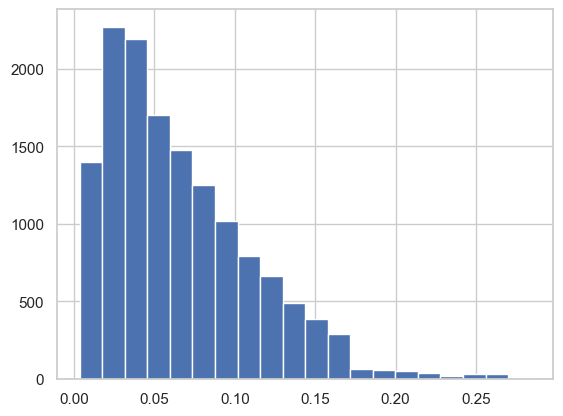

In [78]:
#Removing Skewness
merged_df['Item_Visibility']=np.log((merged_df['Item_Visibility']+1).astype('float'))
merged_df['Item_Visibility'].hist(bins=20)


In [79]:
#Scaling numeric predictors
from sklearn.preprocessing import MinMaxScaler
merged_df['Item_Weight'] = MinMaxScaler().fit_transform(merged_df[['Item_Weight']])
merged_df['Item_MRP'] = MinMaxScaler().fit_transform(merged_df[['Item_MRP']])
merged_df['Item_Visibility'] = MinMaxScaler().fit_transform(merged_df[['Item_Visibility']])

#查看结果
merged_df.describe().T #后面加T转置表格


,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,0.490526,0.276970,0.00,0.247395,0.479012,0.726109,1.0000
Item_Fat_Content,14204.0,0.353351,0.478027,0.00,0.000000,0.000000,1.000000,1.0000
Item_Visibility,14204.0,0.223878,0.161574,0.00,0.096654,0.185626,0.317216,1.0000
Item_Type,14204.0,7.229372,4.213471,0.00,4.000000,6.000000,10.000000,15.0000
Item_MRP,14204.0,0.465686,0.263529,0.00,0.266224,0.470958,0.656055,1.0000
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.00,1987.000000,1999.000000,2004.000000,2009.0000
Outlet_Size,14204.0,1.453605,0.683045,0.00,1.000000,2.000000,2.000000,2.0000
Outlet_Location_Type,14204.0,1.112856,0.812755,0.00,0.000000,1.000000,2.000000,2.0000
Outlet_Type,14204.0,1.201281,0.796543,0.00,1.000000,1.000000,1.000000,3.0000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.9648


In [86]:
features = list(set(merged_df.columns.to_list()) - set(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier']))
features

['Outlet_OUT046',
 'Outlet_OUT019',
 'Outlet_Establishment_Year',
 'Outlet_OUT045',
 'Outlet_OUT018',
 'Outlet_OUT010',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Location_Type',
 'Item_MRP',
 'Outlet_OUT017',
 'Item_Fat_Content',
 'Outlet_OUT049',
 'Outlet_OUT035',
 'Item_Type',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_OUT013',
 'Outlet_OUT027']

In [87]:
# 把merge_df按Item_Outlet_Sales是否为null切分训练集和测试集

from sklearn.model_selection import train_test_split

df1 = merged_df[merged_df['Item_Outlet_Sales'].notnull()]

X = df1[features]  # 选择特征列
y = df1['Item_Outlet_Sales']  # 选择目标变量列

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

print("训练集大小:", X_train.shape, y_train.shape)
print("测试集大小:", X_test.shape, y_test.shape)

df2 = merged_df[merged_df['Item_Outlet_Sales'].isnull()]
df2.to_csv('df2.csv', index=False)

# 打印训练集和测试集的shape
print('df1 shape:', df1.shape)
print('df2 shape:', df2.shape)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

训练集大小: (6818, 19) (6818,)
测试集大小: (1705, 19) (1705,)
df1 shape: (8523, 22)
df2 shape: (5681, 22)
X_train shape: (6818, 19)
X_test shape: (1705, 19)
y_train shape: (6818,)
y_test shape: (1705,)


In [116]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

ridge = Ridge(random_state=48)
lasso = Lasso(random_state=48)
elastic_net = ElasticNet(random_state=48)

models = [ridge, lasso, elastic_net]
names = ['Ridge', 'Lasso', 'ElasticNet']

for model, name in zip(models, names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f}')
    print(f'{name} R-squared: {r2:.2f}')
    print(f'{name} MAE: {mae:.2f}')
    print(f'{name} Accuracy: {model.score(X_test, y_test):.2f}')
    print()


Ridge MSE: 1396670.75
Ridge R-squared: 0.56
Ridge MAE: 861.88
Ridge Accuracy: 0.56

Lasso MSE: 1396856.10
Lasso R-squared: 0.56
Lasso MAE: 861.45
Lasso Accuracy: 0.56

ElasticNet MSE: 2474480.27
ElasticNet R-squared: 0.22
ElasticNet MAE: 1228.17
ElasticNet Accuracy: 0.22



c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.587e+09, tolerance: 1.526e+06
  model = cd_fast.enet_coordinate_descent(
c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+09, tolerance: 1.536e+06
  model = cd_fast.enet_coordinate_descent(
c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

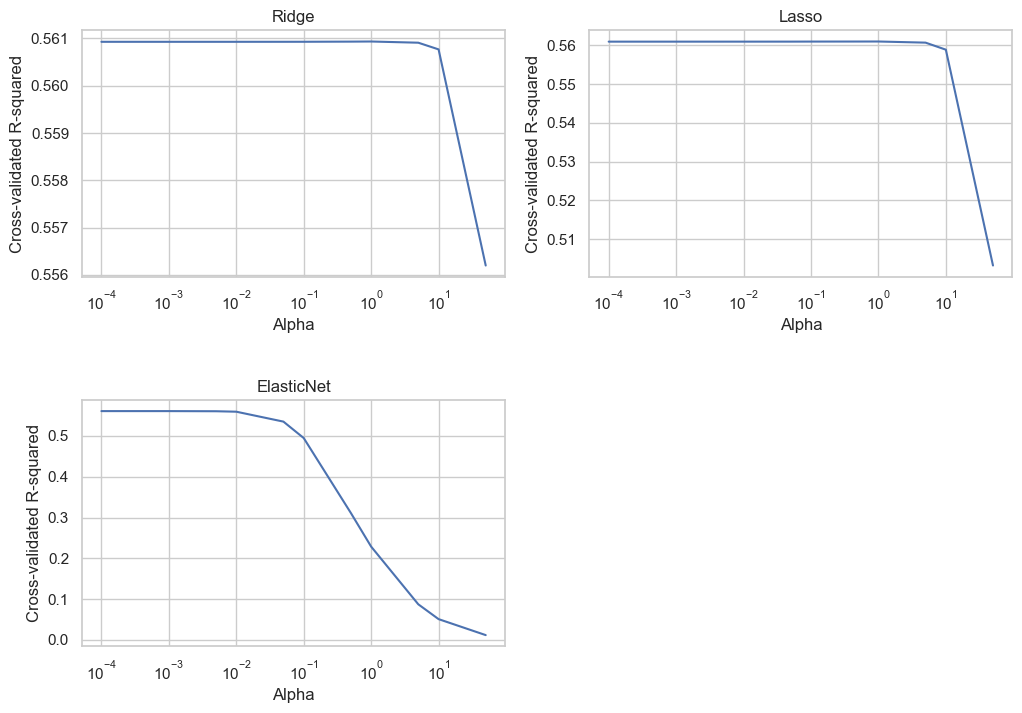

In [107]:
from sklearn.model_selection import cross_val_score

scores = []
Alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]

for index, model in enumerate(models):
    model_scores = []
    for alpha in Alphas:
        if index > 0:
            model.alpha = alpha
        model.alpha = alpha
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        model_scores.append(cv_scores.mean())
    scores.append(model_scores)

fig = plt.figure(figsize=(12, 8))
for index, score in enumerate(scores):
    plt.subplot(2, 2, index+1)
    plt.plot(Alphas, score)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Cross-validated R-squared')
    plt.title(names[index])

# 调整子图间距
plt.subplots_adjust(hspace=0.5)

plt.show()


In [129]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.1, 1, 10], cv=10, gcv_mode='auto',  \
                   fit_intercept=True, scoring=None, store_cv_values=False)
ridge_cv.fit(X_train, y_train)


print("Best alpha: ", ridge_cv.alpha_)
print("Best score: ", ridge_cv.score(X_test, y_test))
# print("Best coef: ", ridge_cv.coef_)
# print("Best intercept: ", ridge_cv.intercept_)
print(pd.Series(index=['Intercept']+X_train.columns.tolist(),
                data=[ridge_cv.intercept_]+ridge_cv.coef_.tolist()))

Best alpha:  1.0
Best score:  0.56101232749412
Intercept                   -22624.192608
Outlet_OUT046                  169.411803
Outlet_OUT019                 -715.004284
Outlet_Establishment_Year       11.304816
Outlet_OUT045                  269.278968
Outlet_OUT018                 -841.230542
Outlet_OUT010                 -443.646370
Item_Visibility                -70.678158
Item_Weight                    -22.938626
Outlet_Location_Type          -211.557326
Item_MRP                      3647.362464
Outlet_OUT017                  369.946362
Item_Fat_Content                52.309897
Outlet_OUT049                   86.886578
Outlet_OUT035                  489.743804
Item_Type                       -1.889044
Outlet_Type                    849.455255
Outlet_Size                   -208.865829
Outlet_OUT013                  348.596111
Outlet_OUT027                  266.017571
dtype: float64


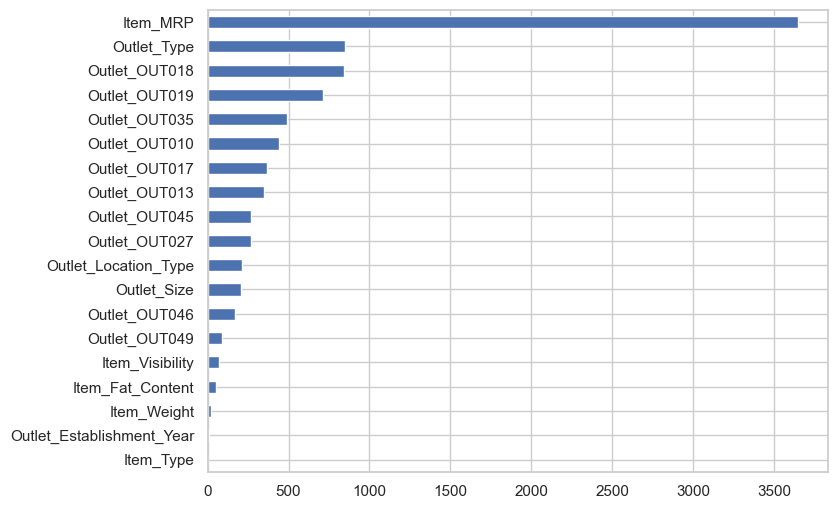

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算特征重要性
importances = pd.Series(np.abs(ridge.coef_), index=X.columns).sort_values(ascending=True)

# 绘制水平条形图
importances.plot(kind='barh', figsize=(8,6))
plt.show()
